In [ ]:
"Travelling Salesman using hill climbing"
import numpy as np
import time
# dist_matrix=[[0,1300,1500,1300],[400,0,1200,500],[500,600,0,400],[100,500,400,0]]
dist_matrix = [
    [0, 807, 465, 926, 996, 1159, 1167, 512, 373, 1063],
    [807, 0, 912, 329, 478, 912, 401, 746, 626, 963],
    [465, 912, 0, 661, 734, 755, 793, 434, 446, 692],
    [926, 329, 661, 0, 607, 486, 265, 846, 870, 409],
    [996, 478, 734, 607, 0, 283, 665, 946, 956, 850],
    [1159, 912, 755, 486, 283, 0, 357, 817, 976, 736],
    [1167, 401, 793, 265, 665, 357, 0, 673, 855, 669],
    [512, 746, 434, 846, 946, 817, 673, 0, 282, 589],
    [373, 626, 446, 870, 956, 976, 855, 282, 0, 402],
    [1063, 963, 692, 409, 850, 736, 669, 589, 402, 0]
]

from itertools import combinations
time_list=[]
for times in range(len(dist_matrix)):
  ts=time.time()
  def random_sol():
    cities=list(range(len(dist_matrix)))
    soln=[i for i in range(len(dist_matrix))]
    if len(soln)==len(cities):
      soln_list=list(itertools.permutations(soln,len(soln)))
      min_dist=dist_cal(dist_matrix,soln_list[0])
      for i in soln_list:
        dist=dist_cal(dist_matrix,i)
        if(dist<=min_dist):
          min_dist=dist
          soln=i
    return soln,min_dist

  def dist_cal(dist_matrix,soln):
    dist=0
    for i in range(len(soln)):
      if i+1 < len(soln):
        dist+=dist_matrix[soln[i]][soln[i+1]]
      else:
        dist+=dist_matrix[soln[i]][soln[0]]
    return dist

  sol=random_sol()
  t_end=time.time()
  time_list.append(t_end-ts)


Time List: [7.006361722946167, 5.659897565841675, 6.978904485702515, 5.687649250030518, 7.025265216827393, 5.708243131637573, 6.901581048965454, 5.685381174087524, 6.861033201217651, 5.784887313842773]
Average time =  6.329920411109924


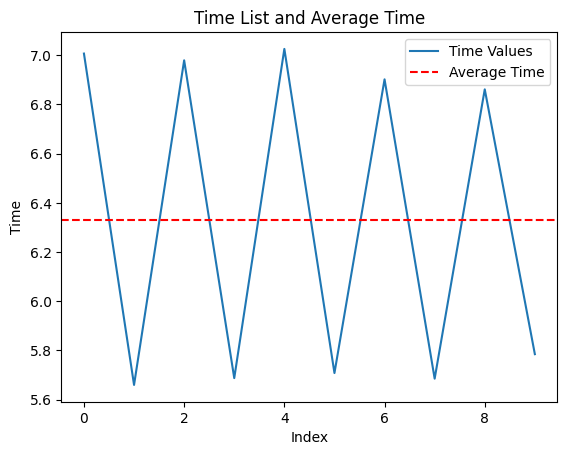

In [ ]:
import matplotlib.pyplot as plt
print("Time List:", time_list)
average_time = sum(time_list) / len(time_list)
print("Average time = ", average_time)
plt.plot(time_list, label='Time Values')
plt.axhline(average_time, color='r', linestyle='--', label='Average Time')
plt.title('Time List and Average Time')
plt.xlabel('Index')
plt.ylabel('Time')
plt.legend()
plt.show()


Running simulation 1...
Best Solution: [1, 4, 5, 6, 3, 9, 8, 7, 2, 0]
Best Cost: 4182
Time taken (seconds): 0.01
Running simulation 2...
Best Solution: [8, 9, 3, 1, 6, 5, 4, 2, 0, 7]
Best Cost: 4174
Time taken (seconds): 0.01
Running simulation 3...
Best Solution: [2, 0, 1, 4, 5, 6, 3, 9, 8, 7]
Best Cost: 4182
Time taken (seconds): 0.01
Running simulation 4...
Best Solution: [5, 4, 1, 6, 3, 9, 8, 7, 0, 2]
Best Cost: 4252
Time taken (seconds): 0.01
Running simulation 5...
Best Solution: [8, 9, 3, 6, 5, 4, 1, 0, 2, 7]
Best Cost: 4182
Time taken (seconds): 0.01
Average Time to Reach Solution: 0.01 seconds


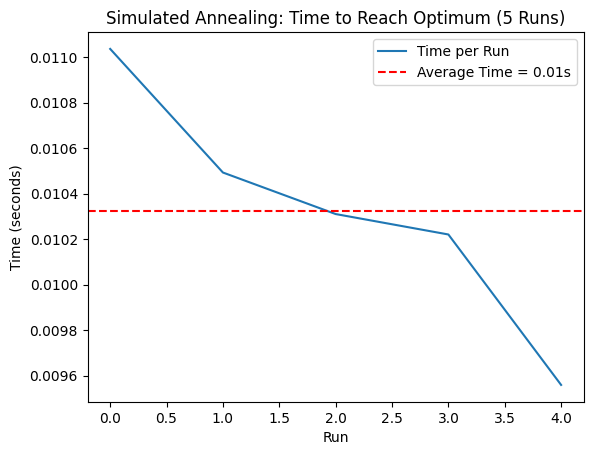

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time


dist_matrix = [
    [0, 807, 465, 926, 996, 1159, 1167, 512, 373, 1063],
    [807, 0, 912, 329, 478, 912, 401, 746, 626, 963],
    [465, 912, 0, 661, 734, 755, 793, 434, 446, 692],
    [926, 329, 661, 0, 607, 486, 265, 846, 870, 409],
    [996, 478, 734, 607, 0, 283, 665, 946, 956, 850],
    [1159, 912, 755, 486, 283, 0, 357, 817, 976, 736],
    [1167, 401, 793, 265, 665, 357, 0, 673, 855, 669],
    [512, 746, 434, 846, 946, 817, 673, 0, 282, 589],
    [373, 626, 446, 870, 956, 976, 855, 282, 0, 402],
    [1063, 963, 692, 409, 850, 736, 669, 589, 402, 0]
]
def dist_cal(dist_matrix, soln):
    dist = 0
    for i in range(len(soln)):
        if i + 1 < len(soln):
            dist += dist_matrix[soln[i]][soln[i + 1]]
        else:
            dist += dist_matrix[soln[i]][soln[0]]
    return dist

def generate_neighbor(soln):
    new_soln = soln[:]
    i, j = random.sample(range(len(soln)), 2)
    new_soln[i], new_soln[j] = new_soln[j], new_soln[i]
    return new_soln


def simulated_annealing(dist_matrix, max_time=600):
    start_time = time.time()

    cities = list(range(len(dist_matrix)))
    current_solution = random.sample(cities, len(cities))
    current_cost = dist_cal(dist_matrix, current_solution)


    temp = 1000
    cooling_rate = 0.995

    best_solution = current_solution
    best_cost = current_cost

    while temp > 0.1:
        elapsed_time = time.time() - start_time
        if elapsed_time > max_time:
            print("Timeout reached! No solution found within the given time.")
            break

        neighbor_solution = generate_neighbor(current_solution)
        neighbor_cost = dist_cal(dist_matrix, neighbor_solution)

        if neighbor_cost < current_cost or random.random() < np.exp((current_cost - neighbor_cost) / temp):
            current_solution = neighbor_solution
            current_cost = neighbor_cost


            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost

        temp *= cooling_rate

    return best_solution, best_cost, elapsed_time
run_times = []

for i in range(5):
    print(f"Running simulation {i + 1}...")
    best_solution, best_cost, run_time = simulated_annealing(dist_matrix)
    print(f"Best Solution: {best_solution}")
    print(f"Best Cost: {best_cost}")
    print(f"Time taken (seconds): {run_time:.2f}")
    run_times.append(run_time)


average_time = sum(run_times) / len(run_times)
print(f"Average Time to Reach Solution: {average_time:.2f} seconds")

plt.plot(run_times, label='Time per Run')
plt.axhline(y=average_time, color='r', linestyle='--', label=f'Average Time = {average_time:.2f}s')
plt.title('Simulated Annealing: Time to Reach Optimum (5 Runs)')
plt.xlabel('Run')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()
